# Trident LightRay Demo

#### Date: 12/11/2020
#### Author: Cameron Hummels

This first cell is all code taken from the example script `gizmo_script.py`, which is in the trident/examples directory.  I think you're mostly familiar with how it works.  It loads a dataset, identifies what ions we care about, and sets the ray's (skewer) trajectory.  Then it creates a LightRay (skewer) object.  

If you want to use the same dataset, it's a cheap FIRE dataset that should operate akin to the EAGLE and Illustris datasets.  You can find it here: http://yt-project.org/data/FIRE_M12i_ref11.tar.gz

In [45]:
import yt
import trident
import numpy as np
trident.verify()
fn = 'static\data\RefL0012N0188\snapshot_028_z000p000\snap_028_z000p000.0.hdf5'
ds = yt.load(fn)
_, c = ds.find_max(('gas', 'density'))
ray_start = c
ray_end = ds.domain_right_edge
line_list = ['H', 'C', 'N', 'O', 'Mg']

# Make a LightRay object including all necessary fields so you can add
# all H, C, N, O, and Mg fields to the resulting spectrum from your dataset.
# Save LightRay to ray.h5 and use it locally as ray object.
ray = trident.make_simple_ray(ds, start_position=ray_start,
                              end_position=ray_end, data_filename='ray.h5',
                              lines=line_list)

yt : [INFO     ] 2021-02-09 12:28:13,132 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-02-09 12:28:13,134 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-09 12:28:13,134 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-02-09 12:28:13,135 Parameters: domain_right_edge         = [3.08567758e+22 3.08567758e+22 3.08567758e+22]
yt : [INFO     ] 2021-02-09 12:28:13,135 Parameters: cosmological_simulation   = 0.0



Creating single-cell dataset
----------------------------


Creating ray object through single-cell dataset
-----------------------------------------------



yt : [INFO     ] 2021-02-09 12:28:13,728 Getting segment at z = 0.0: [0. 0. 0.] unitary to [1. 1. 1.] unitary.
yt : [INFO     ] 2021-02-09 12:28:13,730 Getting subsegment: [unyt_quantity(0., 'unitary'), unyt_quantity(0., 'unitary'), unyt_quantity(0., 'unitary')] to [unyt_quantity(1., 'unitary'), unyt_quantity(1., 'unitary'), unyt_quantity(1., 'unitary')].
C:\Users\david\Anaconda3\envs\py37\lib\site-packages\unyt\array.py:1779: RuntimeWarning: invalid value encountered in true_divide
  inp0.view(np.ndarray), inp1.view(np.ndarray), out=out_func, **kwargs
yt : [INFO     ] 2021-02-09 12:28:13,857 Saving field data to yt dataset: C:\Users\david\AppData\Local\Temp\tmpktc4hhtd\ray.h5.
yt : [INFO     ] 2021-02-09 12:28:13,907 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-02-09 12:28:13,908 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-09 12:28:13,909 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-02-


Create spectrum with Lyman alpha, Mg II, and O VI lines
-------------------------------------------------------



yt : [INFO     ] 2021-02-09 12:28:14,291 Creating H_p0_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-02-09 12:28:14,294 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-02-09 12:28:14,298 Creating O_p5_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-02-09 12:28:14,301 Creating spectrum
yt : [INFO     ] 2021-02-09 12:28:14,409 1 out of 1 line components will be deposited as unresolved lines.
yt : [INFO     ] 2021-02-09 12:28:14,421 Not adding line O VI 1038: insufficient column density
yt : [INFO     ] 2021-02-09 12:28:14,421 Not adding line O VI 1032: insufficient column density
yt : [INFO     ] 2021-02-09 12:28:14,423 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2021-02-09 12:28:14,424 Writing spectrum to hdf5 file: C:\Users\david\AppData\Local\Temp\tmpktc4hhtd\spec_raw.h5.
yt : [INFO     ] 2021-02-09 12:28:14,436 Writing s

Removing all temporary data files...

Congratulations, you have verified that Trident is installed correctly.
Now let's science!



yt : [INFO     ] 2021-02-09 12:28:14,945 Allocating for 1.329e+07 particles
Loading particle index:  97%|████████████████████████████████████████████████████████▏ | 31/32 [00:00<00:00, 50.17it/s]
yt : [INFO     ] 2021-02-09 12:28:19,594 max value is 2.45472e-23 at 2.1271807118943684 0.4949305076380143 7.0622206562180407
yt : [INFO     ] 2021-02-09 12:28:19,632 Getting segment at z = 2.220446049250313e-16: [0.25110588 0.05842473 0.83366925] unitary to [1. 1. 1.] unitary.
yt : [INFO     ] 2021-02-09 12:28:19,635 Getting subsegment: [unyt_quantity(0.25110588, 'unitary'), unyt_quantity(0.05842473, 'unitary'), unyt_quantity(0.83366925, 'unitary')] to [unyt_quantity(1., 'unitary'), unyt_quantity(1., 'unitary'), unyt_quantity(1., 'unitary')].
yt : [INFO     ] 2021-02-09 12:28:35,296 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-02-09 12:28:35,377 Parameters: current_time              = 4.361428036047735e+17 s
yt : [INFO     ] 2021-02-09 12:28:35,378 Parameters: domain_dimensi

In [29]:
# import numpy as n
import scipy.interpolate
import scipy.ndimage
def congrid(a, newdims, method='linear', centre=False, minusone=False):
    '''Arbitrary resampling of source array to new dimension sizes.
    Currently only supports maintaining the same number of dimensions.
    To use 1-D arrays, first promote them to shape (x,1).
    
    Uses the same parameters and creates the same co-ordinate lookup points
    as IDL''s congrid routine, which apparently originally came from a VAX/VMS
    routine of the same name.

    method:
    neighbour - closest value from original data
    nearest and linear - uses n x 1-D interpolations using
                         scipy.interpolate.interp1d
    (see Numerical Recipes for validity of use of n 1-D interpolations)
    spline - uses ndimage.map_coordinates

    centre:
    True - interpolation points are at the centres of the bins
    False - points are at the front edge of the bin

    minusone:
    For example- inarray.shape = (i,j) & new dimensions = (x,y)
    False - inarray is resampled by factors of (i/x) * (j/y)
    True - inarray is resampled by(i-1)/(x-1) * (j-1)/(y-1)
    This prevents extrapolation one element beyond bounds of input array.
    '''
    if not a.dtype in [n.float64, n.float32]:
        a = n.cast[float](a)

    m1 = n.cast[int](minusone)
    ofs = n.cast[int](centre) * 0.5
    old = n.array( a.shape )
    ndims = len( a.shape )
    if len( newdims ) != ndims:
        print("[congrid] dimensions error. " \
              "This routine currently only support " \
              "rebinning to the same number of dimensions.")
        return None
    newdims = n.asarray( newdims, dtype=float )
    dimlist = []

    if method == 'neighbour':
        for i in range( ndims ):
            base = n.indices(newdims)[i]
            dimlist.append( (old[i] - m1) / (newdims[i] - m1) \
                            * (base + ofs) - ofs )
        cd = n.array( dimlist ).round().astype(int)
        newa = a[list( cd )]
        return newa

    elif method in ['nearest','linear']:
        # calculate new dims
        for i in range( ndims ):
            base = n.arange( newdims[i] )
            dimlist.append( (old[i] - m1) / (newdims[i] - m1) \
                            * (base + ofs) - ofs )
        # specify old dims
        olddims = [n.arange(i, dtype = n.float) for i in list( a.shape )]

        # first interpolation - for ndims = any
        mint = scipy.interpolate.interp1d( olddims[-1], a, kind=method )
        newa = mint( dimlist[-1] )

        trorder = [ndims - 1] + range( ndims - 1 )
        for i in range( ndims - 2, -1, -1 ):
            newa = newa.transpose( trorder )

            mint = scipy.interpolate.interp1d( olddims[i], newa, kind=method )
            newa = mint( dimlist[i] )

        if ndims > 1:
            # need one more transpose to return to original dimensions
            newa = newa.transpose( trorder )

        return newa
    elif method in ['spline']:
        oslices = [ slice(0,j) for j in old ]
        oldcoords = n.ogrid[oslices]
        nslices = [ slice(0,j) for j in list(newdims) ]
        newcoords = n.mgrid[nslices]

        newcoords_dims = list(range(n.ndim(newcoords)))
        #make first index last
        newcoords_dims.append(newcoords_dims.pop(0))
        newcoords_tr = newcoords.transpose(newcoords_dims)
        # makes a view that affects newcoords

        newcoords_tr += ofs

        deltas = (n.asarray(old) - m1) / (newdims - m1)
        newcoords_tr *= deltas

        newcoords_tr -= ofs

        newa = scipy.ndimage.map_coordinates(a, newcoords)
        return newa
    else:
        print ("Congrid error: Unrecognized interpolation type.\n", \
              "Currently only \'neighbour\', \'nearest\',\'linear\',", \
              "and \'spline\' are supported.")
        return None

In [67]:
from scipy import stats

In [16]:
from scipy import interpolate
# H_I = n.array([np.array(ray.r[('gas', 'l')].to('kpc').tolist()),np.array(ray.r[('gas', 'H_p0_number_density')] * ray.r[('gas', 'dl')].to('kpc').tolist())])
oldx = np.array(ray.r[('gas', 'l')].to('kpc').tolist())
oldy = np.array(ray.r[('gas', 'C_p0_number_density')] * ray.r[('gas', 'dl')].to('kpc').tolist())
newdx = 1
terpfunc = interpolate.interp1d(oldx, oldy,fill_value="extrapolate")
newx = np.arange(np.min(oldx), np.max(oldx)+newdx, newdx)
newy = terpfunc(newx)

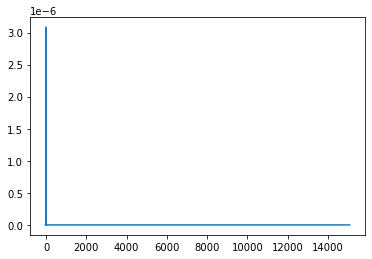

In [17]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(newx,newy)
plt.show()


In [41]:
ad = ds.all_data()
ad['PartType0','Metallicity'][400000]

unyt_quantity(6.94850096e-05, 'code_metallicity')

In [44]:
0.00536564/(6.94850096e-5)

77.22010878156372

[  -42.27581377   -20.55421737   -20.44758651 ... 15020.17239298
 15052.0435529  15089.59753563]
(2, 2801)
(2, 1000)
[-4.22758138e+01 -1.96552972e+01 -1.61629005e+01 -1.26412576e+01
 -1.10587306e+01 -8.79475146e+00 -4.63780268e+00 -1.06795011e+00
 -6.53656512e-01 -6.12627012e-01 -5.16491152e-01 -3.83868677e-01
 -3.47836179e-01 -3.22076320e-01 -2.33667263e-01 -2.16132098e-01
 -1.90911618e-01 -1.42065315e-01 -1.18332022e-01 -8.51713154e-02
 -6.02728326e-02 -1.90799453e-02 -5.57274215e-04  1.48367932e-02
  7.78437357e-02  1.22200990e-01  1.91525301e-01  2.16084598e-01
  2.54593271e-01  2.85189742e-01  4.05034121e-01  4.58560820e-01
  4.71430843e-01  6.98068243e-01  8.77854483e-01  9.90518507e-01
  1.23245873e+00  1.51569326e+00  1.71040176e+00  2.73299139e+00
  4.53867344e+00  5.97662497e+00  6.94217422e+00  9.60321330e+00
  1.03744275e+01  1.17489288e+01  1.45256094e+01  1.87654197e+01
  2.16686626e+01  2.58624727e+01  2.61287954e+01  2.73393241e+01
  2.80885644e+01  2.85813521e+01  2.92

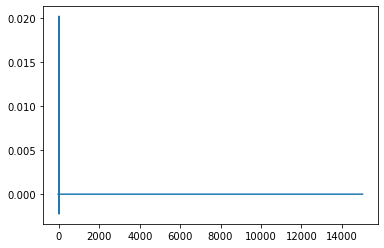

In [79]:
import matplotlib
import matplotlib.pyplot as plt
H_I = n.array([np.array(ray.r[('gas', 'l')].to('kpc').tolist()),np.array(ray.r[('gas', 'H_p0_number_density')] * ray.r[('gas', 'dl')].to('kpc').tolist())])
print(H_I[0])
print(H_I.shape)

H_I   = congrid(H_I,(2,1000),method='spline',centre=False,minusone=False)
# stats.binned_statistics()


# H_I   = resize_array(H_I,2,1000)

print(H_I.shape)
print(H_I[0])
fig, ax = plt.subplots()
ax.plot(H_I[0],H_I[1])
plt.show()

This LightRay object is a yt dataset of a 1D data structure representing the skewer path as it traverses the dataset.  Because it is a yt dataset, it can be loaded as such and manipulated as such.  Let's see what fields (i.e., what 1D arrays in this case) exist for this dataset:

(**Note**: I use the `for i in list: print(i)` construction throughout this demo, because it shows all of the elements of these lists in order, instead of just showing the first 3 and last 3 elements of the array.  For your purposes, you won't need to use this construction, and just use the lists/arrays directly.)

(**Note**: I also use the `DATASET.r[FIELD]` construction to access all of the elements of the internal arrays associated with whatever FIELD a DATASET possesses.  This can be modified to look at a subset with: `DATASET.r[FIELD][0:2]` for your desired subset of elements.)

In [46]:
for field in ray.derived_field_list: print(field)

yt : [INFO     ] 2021-02-09 12:28:35,415 Allocating for 2.801e+03 particles


('all', 'C_p0_number_density')
('all', 'C_p1_number_density')
('all', 'C_p2_number_density')
('all', 'C_p3_number_density')
('all', 'C_p4_number_density')
('all', 'C_p5_number_density')
('all', 'H_nuclei_density')
('all', 'H_p0_number_density')
('all', 'H_p1_number_density')
('all', 'Mg_p0_number_density')
('all', 'Mg_p1_number_density')
('all', 'N_p1_number_density')
('all', 'N_p2_number_density')
('all', 'N_p3_number_density')
('all', 'N_p4_number_density')
('all', 'N_p5_number_density')
('all', 'N_p6_number_density')
('all', 'O_p0_number_density')
('all', 'O_p5_number_density')
('all', 'O_p6_number_density')
('all', 'O_p7_number_density')
('all', 'density')
('all', 'dl')
('all', 'l')
('all', 'metallicity')
('all', 'redshift')
('all', 'redshift_dopp')
('all', 'redshift_eff')
('all', 'relative_velocity_x')
('all', 'relative_velocity_y')
('all', 'relative_velocity_z')
('all', 'temperature')
('all', 'velocity_los')
('all', 'x')
('all', 'y')
('all', 'z')
('gas', 'C_p0_number_density')
('

OK, so there's a ton of stuff here.  I think the 'all', 'gas', and 'grid' fields mirror each other, but they each needed to be included for backwards compatibility.  Just stick with using the 'gas' ones for simplicity sake.  The fields that I think are relevant for what we're doing are: 

`('gas', 'density')` -- the gas density

`('gas', 'temperature')` -- the gas temperature

`('gas', 'ION_number_density')` -- the number density of ions

`('gas', 'l')`  -- the 1D location of the gas going from nearby (0) to faraway along the LightRay

`('gas', 'dl')` -- the "path length" of each element of the array

Recall that all of these 1D arrays are in the same order, and each element represents a volumetric element of gas intersected by the skewer.  

let's look at the array `('gas', 'l')` to see the location of each resolution element:


In [3]:
for i in ray.r[('gas', 'l')]: print(i)

-1.3044953076867346e+23 cm
-6.342368772739506e+22 cm
-6.309465926600817e+22 cm
-5.854307798843866e+22 cm
-5.352568471014023e+22 cm
-5.211071440397103e+22 cm
-4.870794445526724e+22 cm
-4.7766449248156286e+22 cm
-4.122707374952059e+22 cm
-3.6922469382303003e+22 cm
-3.5242788605135728e+22 cm
-3.4535707627756204e+22 cm
-3.2305249465590218e+22 cm
-3.112151481218435e+22 cm
-2.714764880144725e+22 cm
-2.542529776773672e+22 cm
-1.611754509923219e+22 cm
-1.437990168366623e+22 cm
-1.2131991400655362e+22 cm
-4.5648725646880953e+21 cm
-3.403497789773573e+21 cm
-2.8485306904816695e+21 cm
-2.0904721135734885e+21 cm
-2.0437279445793002e+21 cm
-1.9651083659052015e+21 cm
-1.8903170738627768e+21 cm
-1.8823963780371534e+21 cm
-1.7428460151901357e+21 cm
-1.5966638839282627e+21 cm
-1.2505342633891227e+21 cm
-1.2501118654159963e+21 cm
-1.1607294741202673e+21 cm
-1.0800313056167132e+21 cm
-1.0752176667935122e+21 cm
-1.0651243384377767e+21 cm
-1.0361817966610941e+21 cm
-1.032180991837827e+21 cm
-9.237220642465

3.134858816989822e+25 cm
3.142077456050317e+25 cm
3.1425474730645903e+25 cm
3.143015530865139e+25 cm
3.143147817568397e+25 cm
3.143748860425033e+25 cm
3.1455107996464646e+25 cm
3.1490505091913735e+25 cm
3.1529419557798546e+25 cm
3.15329446538915e+25 cm
3.1568540116163676e+25 cm
3.1603800976913457e+25 cm
3.16148800204062e+25 cm
3.162538112164428e+25 cm
3.162954554241696e+25 cm
3.163307347538078e+25 cm
3.1641705599318264e+25 cm
3.168507180071196e+25 cm
3.1691444288531613e+25 cm
3.173136288917493e+25 cm
3.175558694642806e+25 cm
3.1799365050259974e+25 cm
3.180610458401048e+25 cm
3.1819962319041936e+25 cm
3.18443394105294e+25 cm
3.1867757412640768e+25 cm
3.1890398974993093e+25 cm
3.189402173242065e+25 cm
3.1908916345769915e+25 cm
3.19182872583558e+25 cm
3.2063843745493682e+25 cm
3.2095916056743e+25 cm
3.2104203341085076e+25 cm
3.21494871527302e+25 cm
3.2167650126674024e+25 cm
3.2188534190172232e+25 cm
3.2200397036079385e+25 cm
3.220905233253541e+25 cm
3.22314462981784e+25 cm
3.2311017091128

it's already ordered for us, and it gives the location of each element along the ray in CGS units, but this is easily converted to kpc if we want:

In [4]:
for i in ray.r[('gas', 'l')].to('kpc'): print(i)

-42.27581377053347 kpc
-20.554217368236905 kpc
-20.447586505888587 kpc
-18.97251947177869 kpc
-17.346493049169208 kpc
-16.8879324027494 kpc
-15.78516976491004 kpc
-15.480051948026096 kpc
-13.360784679474898 kpc
-11.965757410982667 kpc
-11.421409943337185 kpc
-11.192260604552732 kpc
-10.469418342636834 kpc
-10.085796067675528 kpc
-8.797953800792357 kpc
-8.23977784477644 kpc
-5.223340636323267 kpc
-4.660208756866165 kpc
-3.931710647770199 kpc
-1.4793744469130363 kpc
-1.102998515065897 kpc
-0.9231459268642395 kpc
-0.6774758731991489 kpc
-0.6623271197186864 kpc
-0.6368482494831319 kpc
-0.6126100424507888 kpc
-0.6100431197513817 kpc
-0.5648179271687217 kpc
-0.5174435248125677 kpc
-0.4052705542226874 kpc
-0.40513366436234277 kpc
-0.3761668041021553 kpc
-0.35001430877943046 kpc
-0.3484543146786535 kpc
-0.3451832897284098 kpc
-0.3358036507294265 kpc
-0.3345070781879689 kpc
-0.2993579335526429 kpc
-0.2743073511745664 kpc
-0.23880652397270768 kpc
-0.22600738647108265 kpc
-0.22513487195045326 kpc

11107.064686650558 kpc
11110.280844427914 kpc
11118.90976037888 kpc
11132.100903529248 kpc
11149.098007362403 kpc
11178.772888693138 kpc
11184.510083111598 kpc
11186.6547865834 kpc
11191.35516049418 kpc
11200.02991435763 kpc
11203.859652393148 kpc
11231.063133564217 kpc
11238.767146766419 kpc
11249.138812455752 kpc
11264.010667608574 kpc
11285.223379248084 kpc
11306.742957771208 kpc
11307.409068230936 kpc
11309.464229221574 kpc
11340.455533028395 kpc
11341.208293775551 kpc
11351.16376512954 kpc
11351.522261872506 kpc
11361.708614962294 kpc
11368.012588861739 kpc
11370.65705128177 kpc
11383.70352163548 kpc
11384.408795958341 kpc
11386.262763460814 kpc
11392.65197171752 kpc
11403.867240637659 kpc
11411.941189804033 kpc
11422.150009568002 kpc
11446.2622425196 kpc
11451.014064983752 kpc
11451.378362339356 kpc
11478.876032128514 kpc
11497.4149152216 kpc
11498.920825930209 kpc
11517.38881491979 kpc
11523.840836212783 kpc
11529.12837250202 kpc
11541.987506202904 kpc
11559.729739921791 kpc
115

ok, so if we want to see the temperature (or whatever) as a function of its location along the sightline, we do something similar:

In [53]:
for i in ray.r[('gas', 'metallicity')].to('Zsun'): print(i)

0.0 Zsun
0.0005553434345588937 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.13443804975297 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.009326560694264054 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.006419640330195024 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0001549177792311635 Zsun
0.0 Zsun
0.0 Zsun
0.01229846294480286 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0028793638685365784 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.018091635458516567 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.

0.0 Zsun
6.413304036268755e-08 Zsun
5.854479835284021e-06 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
4.98808853509695e-07 Zsun
0.009736402183195799 Zsun
0.0 Zsun
0.0 Zsun
0.0 Zsun
4.186670113124338e-05 Zsun
0.0 Zsun
1.4768588514286691e-05 Zsun
4.462231099422968e-08 Zsun
0.0 Zsun
0.0 Zsun
0.0001556187222327886 Zsun
0.00015615764173812098 Zsun
0.00022938511603261058 Zsun
0.0 Zsun
0.0 Zsun
0.4540014522991585 Zsun
0.0 Zsun
5.7596556850361566e-05 Zsun
0.0005349813230424709 Zsun
0.0005162017674227587 Zsun
0.0001703247072682608 Zsun
0.0 Zsun
0.007961381475789954 Zsun
6.394292923550365e-05 Zsun
0.00039527408771251025 Zsun
0.0029431383393374072 Zsun
0.009038191177238598 Zsun
0.0005019116742985007 Zsun
0.0012086402210424937 Zsun
0.0 Zsun
2.6150443350859015e-09 Zsun
9.216417233854294e-05 Zsun
0.002131519594650471 Zsun
5.99417512622599e-08 Zsun
0.0 Zsun
0.0 Zsun
0.001336344373709087 Zsun
0.008786018285181186 Zsun
0.0003088923527600251 Zsun
0.010099433700492943 Zsun
0.002059260065016484 Zsun
0.000416

But I think what we really care about are the distribution of various ions, like H I, O VI, C IV, etc.  

First of all, the way trident+yt represents ions as fields is a little weird.  For H I, which is neutral hydrogen, which is H (plus zero energy state), it's represented as `H_p0`.  For ionized hydrogen, H II, which is H (plus one energy state), it's represented as `H_p1`.  That means that O VI, which is Oxygen (plus 5 energy state) is represented as `O_p5`.  In general, just take your ion's level, remove 1, and add a `p`.  It was done this way to handle negative ions too, but admittedly it's mess.

Anyway, n almost all of the simulation datasets, neutral hydrogen (H I) density (units: g * cm^-2) and neutral hydrogen (H I) number density (units: cm**-2) will already be calculated as fields.  

In [6]:
for i in ray.r[('gas', 'H_p0_number_density')]: print(i)

1.8845108570930625e-12 cm**(-3)
7.254916700738601e-11 cm**(-3)
7.091684788985173e-11 cm**(-3)
9.708598879875248e-11 cm**(-3)
3.233501369112369e-11 cm**(-3)
8.196539090019808e-12 cm**(-3)
9.425945171210091e-11 cm**(-3)
1.9806805054016103e-10 cm**(-3)
4.554324571939018e-11 cm**(-3)
1.3723573208261945e-10 cm**(-3)
2.27295039930208e-11 cm**(-3)
1.9410176666520914e-10 cm**(-3)
5.0593318812573836e-11 cm**(-3)
3.457668640063155e-07 cm**(-3)
2.7097942399795604e-07 cm**(-3)
1.1355291265283886e-06 cm**(-3)
2.7792400208748448e-08 cm**(-3)
3.2876856115193786e-10 cm**(-3)
1.3857880870930516e-10 cm**(-3)
3.4130190602289906e-05 cm**(-3)
0.11801665436755022 cm**(-3)
0.0024606555057444727 cm**(-3)
0.5021425509583246 cm**(-3)
0.01583043940998184 cm**(-3)
0.0036554475660494777 cm**(-3)
0.7425623491021806 cm**(-3)
2.7027170084026135e-10 cm**(-3)
1.0686575192990433 cm**(-3)
1.044865102944632 cm**(-3)
0.11250698877171361 cm**(-3)
0.9576377593725146 cm**(-3)
0.8245138207686672 cm**(-3)
0.9327122455599021 cm*

3.182672896195421e-14 cm**(-3)
4.6727806270498256e-14 cm**(-3)
1.8050495610550827e-13 cm**(-3)
3.855677555645644e-14 cm**(-3)
1.0608980055727757e-13 cm**(-3)
1.042899305920112e-13 cm**(-3)
5.106075398993052e-14 cm**(-3)
1.7987200701257403e-13 cm**(-3)
1.9814001981406808e-13 cm**(-3)
9.372324236073753e-14 cm**(-3)
2.383007168378946e-13 cm**(-3)
5.850947085633709e-14 cm**(-3)
4.687824416938342e-14 cm**(-3)
6.606945470889924e-14 cm**(-3)
1.843549579326586e-13 cm**(-3)
3.7031050097765546e-14 cm**(-3)
6.692705079073093e-14 cm**(-3)
5.722128269348505e-14 cm**(-3)
4.3459367051912846e-14 cm**(-3)
3.077612816976589e-13 cm**(-3)
4.275138128804101e-14 cm**(-3)
1.675978656283415e-13 cm**(-3)
3.886836482243401e-14 cm**(-3)
1.6061689982134484e-13 cm**(-3)
2.5551593967713335e-13 cm**(-3)
2.6374938395460026e-13 cm**(-3)
1.4638778446285626e-13 cm**(-3)
2.0079471166733307e-13 cm**(-3)
3.5385315745546975e-14 cm**(-3)
6.417855407770898e-14 cm**(-3)
9.271517630348303e-14 cm**(-3)
6.507643732243686e-14 cm**

But I think what we really care about are the **column** densities of these ions.  

To convert an ion number density (units: cm^-3) into an ion column density (units: cm^-2), we simply have to multiply the ion number density value for a given resolution element times the path length of that resolution element.

column density = number density * pathlength

N = n * dl

In [7]:
for i in (ray.r[('gas', 'H_p0_number_density')] * ray.r[('gas', 'dl')]): print(i)

47.400558370333854 cm**(-2)
190182718.6068343 cm**(-2)
2303486694.6519184 cm**(-2)
13938781880.082127 cm**(-2)
35601993914.369026 cm**(-2)
2747162855.5096893 cm**(-2)
4537499230.5713625 cm**(-2)
27140766005.115986 cm**(-2)
25919392054.512657 cm**(-2)
3974061900.90431 cm**(-2)
9013187818.642128 cm**(-2)
48066289285.24621 cm**(-2)
26922364084.990883 cm**(-2)
46794460631015.41 cm**(-2)
239880737489094.88 cm**(-2)
302950830886038.4 cm**(-2)
155740322082.9135 cm**(-2)
4867510770.974809 cm**(-2)
2377112.2513692495 cm**(-2)
300084304687178.44 cm**(-2)
1.8349007238462851e+19 cm**(-2)
1637768674693439.8 cm**(-2)
5.1670195430120284e+19 cm**(-2)
8.861820298452293e+16 cm**(-2)
3.1250345870976292e+16 cm**(-2)
3.0320422406489056e+17 cm**(-2)
169554200.0342479 cm**(-2)
1.2405877587645853e+20 cm**(-2)
8.417343809509377e+18 cm**(-2)
2.4478638958560784e+17 cm**(-2)
3.332193516617488e+19 cm**(-2)
17785841074545.81 cm**(-2)
8.964446513961464e+17 cm**(-2)
1.843147170378753e+17 cm**(-2)
1417711096525195.8 c

633292.281857917 cm**(-2)
1746579398.2904274 cm**(-2)
38959636.855125256 cm**(-2)
2779598608.7938957 cm**(-2)
16215330.544927241 cm**(-2)
7248629970.1391735 cm**(-2)
1180514946.3009298 cm**(-2)
229172159.18478072 cm**(-2)
104548473.3987993 cm**(-2)
55836963.494808115 cm**(-2)
97676645.36545698 cm**(-2)
91851987.09942067 cm**(-2)
1744263085.493789 cm**(-2)
1139399554.8023982 cm**(-2)
569535.0594625995 cm**(-2)
1127592189.0466306 cm**(-2)
19552932314.402763 cm**(-2)
15391654576.290897 cm**(-2)
8510036.356476877 cm**(-2)
75966264.95074487 cm**(-2)
106838425.0454068 cm**(-2)
156062048.61888036 cm**(-2)
26254224.004242707 cm**(-2)
1397903265.759531 cm**(-2)
967378280.4666126 cm**(-2)
283312986.00259584 cm**(-2)
854059595.5025256 cm**(-2)
375742597.3721382 cm**(-2)
4020852655.412651 cm**(-2)
1020337111.2227136 cm**(-2)
186765144.97637782 cm**(-2)
78385002.09560367 cm**(-2)
2045643.1129391163 cm**(-2)
82471591.68734667 cm**(-2)
9380303457.11655 cm**(-2)
431574313.2846216 cm**(-2)
806796.16581

OK, so that looks good.  But what about the other ions?  What about O VI?!

The other ion fields, like O VI, don't yet exist on this LightRay object, but we can add them by using the function: `add_ion_fields()`:

In this example, we add O VI, C IV, and all Nitrogen ionizations states.  This is pretty inexpensive step, so feel free to go wild with this one.  'all' should work too.  it'll just take up more memory to store these is all.

In [50]:
trident.add_ion_fields(ray, ions=['He I', 'O II', 'O III', 'O V', 'Ne III', 'Ne IV', 'Ne V', 'Ne VI', 'Ne VIII', 'Na I', 'Na IX', 'Mg X', 'Si II', 'Si III', 'Si IV', 'Si XII', 'S II', 'S III', 'S IV', 'S V', 'S VI', 'O IV'])
for field in ray.derived_field_list: print(field)

yt : [WARNING  ] 2021-02-09 12:37:51,153 Field ('gas', 'O_p3_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2021-02-09 12:37:51,154 Field ('gas', 'O_p3_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2021-02-09 12:37:51,154 Field ('gas', 'O_p3_density') already exists. Not clobbering.
yt : [WARNING  ] 2021-02-09 12:37:51,154 Field ('gas', 'O_p3_mass') already exists. Not clobbering.


('all', 'C_p0_number_density')
('all', 'C_p1_number_density')
('all', 'C_p2_number_density')
('all', 'C_p3_number_density')
('all', 'C_p4_number_density')
('all', 'C_p5_number_density')
('all', 'H_nuclei_density')
('all', 'H_p0_number_density')
('all', 'H_p1_number_density')
('all', 'Mg_p0_number_density')
('all', 'Mg_p1_number_density')
('all', 'N_p1_number_density')
('all', 'N_p2_number_density')
('all', 'N_p3_number_density')
('all', 'N_p4_number_density')
('all', 'N_p5_number_density')
('all', 'N_p6_number_density')
('all', 'O_p0_number_density')
('all', 'O_p5_number_density')
('all', 'O_p6_number_density')
('all', 'O_p7_number_density')
('all', 'density')
('all', 'dl')
('all', 'l')
('all', 'metallicity')
('all', 'redshift')
('all', 'redshift_dopp')
('all', 'redshift_eff')
('all', 'relative_velocity_x')
('all', 'relative_velocity_y')
('all', 'relative_velocity_z')
('all', 'temperature')
('all', 'velocity_los')
('all', 'x')
('all', 'y')
('all', 'z')
('gas', 'C_p0_number_density')
('

Now you can see that the O VI field exists in the field list and thus the array now exists:

In [9]:
('gas', 'O_p5_number_density') in ray.derived_field_list

True

So let's look at the O VI column density distribution across the skewer like we did for H I:

In [10]:
for i in (ray.r[('gas', 'O_p5_number_density')] * ray.r[('gas', 'dl')]): print(i)

126.59698099652479 cm**(-2)
36184.913388698646 cm**(-2)
45221228222.59701 cm**(-2)
79158324.72349602 cm**(-2)
55303476318.113686 cm**(-2)
47217870485.06583 cm**(-2)
166346.10754341388 cm**(-2)
40029533.221521094 cm**(-2)
48770128821.91543 cm**(-2)
62634231.65554885 cm**(-2)
18080418306.604683 cm**(-2)
311865508.4218626 cm**(-2)
193078558.42353502 cm**(-2)
27157171.55078388 cm**(-2)
40331872153.14826 cm**(-2)
78084816.66774489 cm**(-2)
28752462.926124066 cm**(-2)
110656643.50285007 cm**(-2)
14581.211291479454 cm**(-2)
880420.4565977795 cm**(-2)
24.242004917764678 cm**(-2)
6.355826999918412 cm**(-2)
1.7914236511139037 cm**(-2)
13.161507175039834 cm**(-2)
12.092702084572764 cm**(-2)
0.00014768340782053493 cm**(-2)
755451677.089856 cm**(-2)
0.35695353719624867 cm**(-2)
0.0017882313659268168 cm**(-2)
0.6802601967863401 cm**(-2)
2.009748820510203 cm**(-2)
2.3224070494270953e-07 cm**(-2)
0.05079247768758429 cm**(-2)
0.7591359297199983 cm**(-2)
8.081655149959654e-05 cm**(-2)
0.4142160259450153

0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)
0.0 cm**(-2)

Lastly, if you want **total** column density for any ion along the line of sight, that's easy, just sum.  In this case, this is the total O VI along that line of sight:

In [11]:
print((ray.r[('gas', 'O_p5_number_density')] * ray.r[('gas', 'dl')]).sum())

11491128543473.703 cm**(-2)


OK, so I think that is what you need to make progress here.  That should give you the distribution of various fields (density, temperature, ion column density, etc.) along each skewer, and it should be really fast.  Let me know if you have any additional questions!